House Prices: Advanced Regression Techniques

In [631]:
import numpy as np
import pandas as pd
import warnings
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [632]:
train = pd.read_csv('house_prices_train.csv', sep=',')
test = pd.read_csv('house_prices_test.csv', sep=',')

In [633]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [634]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [635]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

сразу посмотрим на пустоту

In [636]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [637]:
missing_values_table(train)

Your selected dataframe has 81 columns.
There are 19 columns that have missing values.


,Missing Values,% of Total Values
PoolQC,1453,99.5
MiscFeature,1406,96.3
Alley,1369,93.8
Fence,1179,80.8
FireplaceQu,690,47.3
LotFrontage,259,17.7
GarageType,81,5.5
GarageYrBlt,81,5.5
GarageFinish,81,5.5
GarageQual,81,5.5


In [638]:
missing_values_table(test)

Your selected dataframe has 80 columns.
There are 33 columns that have missing values.


,Missing Values,% of Total Values
PoolQC,1456,99.8
MiscFeature,1408,96.5
Alley,1352,92.7
Fence,1169,80.1
FireplaceQu,730,50.0
LotFrontage,227,15.6
GarageCond,78,5.3
GarageYrBlt,78,5.3
GarageQual,78,5.3
GarageFinish,78,5.3


**Первый вывод, по большинству данных за Null  принимается отстутвсие сабжекта, что собственно не совсем верно. потому часть придется преобразовать в категорию - "absent"**

ну хоть метки не пустые. первые 4 сразу удалим. Камин удаять не хочу. люблю камины. будем смотреть

In [639]:
missing_values_table(train)[0:4].index

Your selected dataframe has 81 columns.
There are 19 columns that have missing values.


Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], dtype='object')

In [640]:
train=train.drop(missing_values_table(train)[0:4].index, axis=1)
test=test.drop(missing_values_table(test)[0:4].index, axis=1)

Your selected dataframe has 81 columns.
There are 19 columns that have missing values.
Your selected dataframe has 80 columns.
There are 33 columns that have missing values.


In [641]:
train.shape, test.shape

((1460, 77), (1459, 76))

Посмотрим на корреляцию числовых признаков с целевым. 

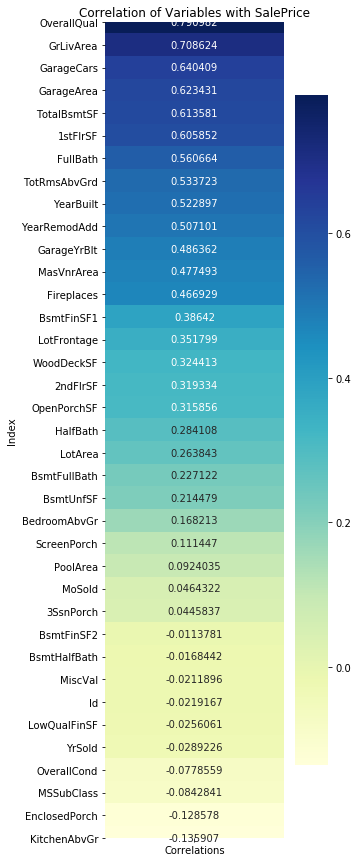

In [642]:
corr = train.corrwith(train['SalePrice'])[:-1].reset_index()
corr.columns = ['Index', 'Correlations']
corr = corr.set_index('Index')
corr = corr.sort_values(by=['Correlations'], ascending = False)
plt.figure(figsize=(4,15))
fig = sns.heatmap(corr, annot=True, fmt="g", cmap='YlGnBu')
plt.title("Correlation of Variables with SalePrice");

как видно, очень высокая корреляция прзинако "Гараж" с целевым. так же достоточная корреляция у признака "LotFrontage". Дропать не будем. 

**посмотрим на баланс значений по признакам**

In [643]:
for i in train.columns:
    if train[i].value_counts().shape[0] < 4:
        print(train[i].value_counts())

Pave    1454
Grvl       6
Name: Street, dtype: int64
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
Y    1365
N      95
Name: CentralAir, dtype: int64
0    1378
1      80
2       2
Name: BsmtHalfBath, dtype: int64
0    913
1    535
2     12
Name: HalfBath, dtype: int64
Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64
Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64


удаляем Utilities и Street

In [644]:
train=train.drop(['Utilities', 'Street'], axis=1)
test=test.drop(['Utilities', 'Street'], axis=1)

**Fireplace**

In [645]:
for dataset in [train, test]:
    dataset['FireplaceQu'] =  dataset['LotFrontage'].fillna('absent')


**LotFrontag**

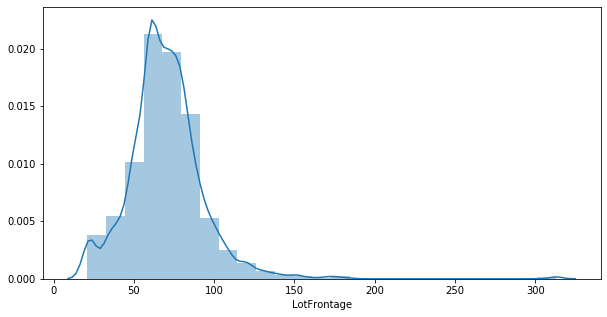

In [646]:
plt.figure(figsize=(10,5))
sns.distplot(train['LotFrontage'],bins=25)
plt.show()

есть выбросы срправа - заменим пустые значения медианой

In [647]:
for dataset in [train, test]:
    dataset['LotFrontage'] =  dataset['LotFrontage'].fillna(dataset['LotFrontage'].median())

**Garage**

In [648]:
for dataset in [train, test]:
    for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
        dataset[col] = dataset[col].fillna('absent')


In [649]:
for dataset in [train, test]:
    dataset['GarageCars'] = dataset['GarageCars'].fillna(0)

**Basement**

In [650]:
for dataset in [train, test]:
    for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
        dataset[col] = dataset[col].fillna('absent')

**MasVnr**

кладку заменим самым популярным типом

In [651]:
for dataset in [train, test]:
    for col in ('MasVnrType','MasVnrArea'):
        dataset[col] = dataset[col].fillna(dataset[col].mode()[0])


**Остальное**

заменим по документации и модой

In [652]:
for dataset in [train, test]:
    dataset['Electrical'] = dataset['Electrical'].fillna("SBrkr")
    dataset['Functional'] = dataset['Functional'].fillna("Typ")
    dataset['KitchenQual'] = dataset['KitchenQual'].fillna("TA")
    dataset['Exterior1st'] = dataset['Exterior1st'].fillna(dataset['Exterior1st'].mode()[0])
    dataset['Exterior2nd'] = dataset['Exterior2nd'].fillna(dataset['Exterior2nd'].mode()[0])
    dataset['SaleType'] = dataset['SaleType'].fillna(dataset['SaleType'].mode()[0])
    dataset['MSZoning'] = dataset['MSZoning'].fillna(dataset['MSZoning'].mode()[0])
    dataset['GarageArea'] = dataset['GarageArea'].fillna(dataset['GarageArea'].mode()[0])
    dataset['BsmtFinSF1'] = dataset['BsmtFinSF1'].fillna(dataset['BsmtFinSF1'].mode()[0])
    dataset['BsmtFinSF2'] = dataset['BsmtFinSF2'].fillna(dataset['BsmtFinSF2'].mode()[0])
    dataset['BsmtUnfSF'] = dataset['BsmtUnfSF'].fillna(dataset['BsmtUnfSF'].mode()[0])
    dataset['BsmtFullBath'] = dataset['BsmtFullBath'].fillna(dataset['BsmtFullBath'].mode()[0])
   

**Engineering**



**посмотрим на корреляцию м/у признаками( видно что есть например, год постройи дома и гаража) - удалим ненужные/преобразуем в новые**

In [653]:
from feature_selector import FeatureSelector

In [654]:
fs = FeatureSelector(data = train.drop(columns=['SalePrice']), labels = train['SalePrice'])

In [655]:
fs.identify_collinear(correlation_threshold = 0.6)

9 features with a correlation magnitude greater than 0.60.



In [656]:
fs.record_collinear

,drop_feature,corr_feature,corr_value
0,1stFlrSF,TotalBsmtSF,0.819530
1,GrLivArea,2ndFlrSF,0.687501
2,BsmtFullBath,BsmtFinSF1,0.649212
3,FullBath,GrLivArea,0.630012
4,HalfBath,2ndFlrSF,0.609707
5,TotRmsAbvGrd,2ndFlrSF,0.616423
6,TotRmsAbvGrd,GrLivArea,0.825489
7,TotRmsAbvGrd,BedroomAbvGr,0.676620
8,GarageYrBlt,YearBuilt,0.825667
9,GarageYrBlt,YearRemodAdd,0.642277


    1. год постройки гаража коррелируется с годом постройки дома - удалим
    2. много ванн/коррелируют -  сложим признаки (обычно важно сколько всего ванн)
    3. есть общая площадь над землей/есть подвал/есть ванные/кухя. проверить равентсно (модет оставить только жилую). посмотреть на корреляцию
    4. Подвал - есть понятие как заверженный и не завершенный. посмотреть на долю есил незавершенны- очень мало - удалим
    5. есть территории снаружи дома/стоит объединить.

In [657]:
corr

,Correlations
Index,
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


сложим ванные вместе

In [658]:
for dataset in [train, test]:
    dataset['FullBathroom']=(dataset['FullBath'] + (0.5*dataset['HalfBath']) + 
                               dataset['BsmtFullBath'] + (0.5*dataset['BsmtHalfBath']))

проверим площадь

как видим - равенство - думаю стоить удалить этажи / оставитв данные только об общей жилой площади

In [659]:
print(train['GrLivArea'].sum(), train['1stFlrSF'].sum(), train['2ndFlrSF'].sum())

2212577 1697435 506609


Подвал 53% недостроя. думаю в тотале. притом что тотал имеет очень сильную корреляцию на метку - предлагаю оставитть только законченную площать и не законченную

п.с. очень странно, что суммы не сходятся

In [660]:
train['BsmtUnfSF'].sum()/train['TotalBsmtSF'].sum()

0.536433338277692

In [661]:
print(train['TotalBsmtSF'].sum(), train['BsmtUnfSF'].sum(), train['BsmtFinSF1'].sum(),train['BsmtFinSF2'].sum())

1543847 828171 647714 67962


In [662]:
for dataset in [train, test]:
    dataset['Total_fin'] = (dataset['BsmtFinSF1'] + dataset['BsmtFinSF2'])

объеденим терр. снаружи

In [663]:
for dataset in [train, test]:
    dataset['outside'] = (dataset['OpenPorchSF'] + dataset['3SsnPorch'] +
                             dataset['EnclosedPorch'] + dataset['ScreenPorch'] +
                             dataset['WoodDeckSF'])

MSSubClass - не число / заменим тип

In [664]:
for dataset in [train, test]:
    dataset['MSSubClass'] = dataset['MSSubClass'].astype('object')

In [746]:
train1=train.copy()
test1=test.copy()

In [747]:
col=['OpenPorchSF','3SsnPorch', 'EnclosedPorch','ScreenPorch','WoodDeckSF',
     'TotalBsmtSF','BsmtFinSF1','BsmtFinSF2','1stFlrSF','2ndFlrSF','GarageYrBlt',
     'FullBath','HalfBath','BsmtFullBath','BsmtHalfBath','Id']

In [748]:
train1=train1.drop(col,axis=1)
test1=test1.drop(col,axis=1)    

In [749]:
missing_values_table(test1)

Your selected dataframe has 61 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [750]:
for dataset in [train, test]:
    dataset['FullBathroom'] = dataset['FullBathroom'].fillna(dataset['FullBathroom'].mode()[0])

**Отмасштабируем признаки/посмотрим на распределение метки**

In [751]:
Y = train1['SalePrice']
X = train1.drop(columns=['SalePrice'])

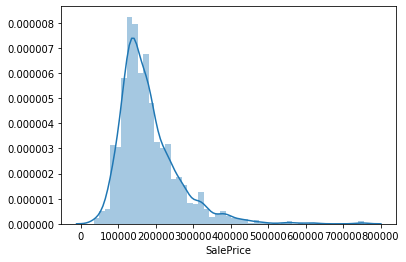

In [752]:
sns.distplot(Y)

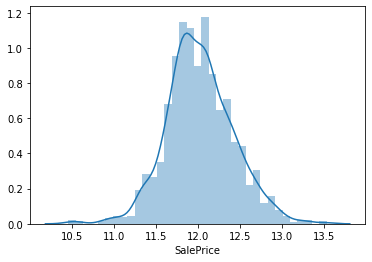

In [753]:
sns.distplot(np.log(Y))

In [754]:
Y=np.log(Y)

In [755]:
from sklearn.preprocessing import StandardScaler

In [756]:
numeriсs = ['int64', 'float64']

num = []
cat=[]
for i in X.columns:
    if X[i].dtype in numeriсs:
        
        num.append(i)
    else:
        cat.append(i)
    



In [757]:
scaler = StandardScaler()
scaler.fit(X[num])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [758]:
X[num]=scaler.transform(train1[num])
test1[num]=scaler.transform(test1[num])

In [759]:
X.shape

(1460, 61)

In [760]:
missing_values_table(test1)

Your selected dataframe has 61 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


**Замена кат. прихнаков**

cначала объеденим - потом сплитанем, чтобы сошлись столбцы

In [761]:
features = pd.concat([train1, test1])
features.shape

(2919, 62)

In [762]:
pd.get_dummies(features[cat]).head()

,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [763]:
X_full=pd.get_dummies(features[cat])

In [764]:
X_full.shape

(2919, 384)

In [694]:
X.shape

(1460, 61)

In [772]:
X1 = X_full.iloc[:1460,:]
t1 = X_full.iloc[1460:,:]

In [773]:
X=pd.concat((X,X1), axis=1).drop(X[cat],axis=1)

In [774]:
test1=pd.concat((test1,t1), axis=1).drop(test1[cat],axis=1)

**Baseline**

**Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)**

In [775]:
from sklearn import ensemble, tree, linear_model
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

In [776]:
def cv_rmse(model):
    rmse = np.sqrt(-cross_val_score(model, X, Y, 
                                   scoring="neg_mean_squared_error", 
                                   cv = 3))
    return(rmse)



In [777]:
ENet = make_pipeline(RobustScaler(), linear_model.ElasticNet(alpha=0.0005, random_state=3))

In [778]:
score = cv_rmse(ENet)
print("ElasticNet score: {:.4f}".format(score.mean()))

ElasticNet score: 0.1385


In [779]:
model_lgb = LGBMRegressor()

In [780]:
score = cv_rmse(model_lgb)
print("LGBM score: {:.4f} ".format(score.mean()))

LGBM score: 0.1362 


In [781]:
GBest = ensemble.GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=3, max_features='sqrt',
                                               min_samples_leaf=15, min_samples_split=10, loss='huber')

In [782]:
model_lgb.fit(X,Y)


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [783]:
ENet.fit(X,Y)

Pipeline(memory=None,
         steps=[('robustscaler',
                 RobustScaler(copy=True, quantile_range=(25.0, 75.0),
                              with_centering=True, with_scaling=True)),
                ('elasticnet',
                 ElasticNet(alpha=0.0005, copy_X=True, fit_intercept=True,
                            l1_ratio=0.5, max_iter=1000, normalize=False,
                            positive=False, precompute=False, random_state=3,
                            selection='cyclic', tol=0.0001,
                            warm_start=False))],
         verbose=False)

In [785]:
Final = (np.exp(model_lgb.predict(test1)) + np.exp(ENet.predict(test1))) / 2

In [786]:
Final

array([120648.7763365 , 153862.2863734 , 177893.14889085, ...,
       163765.96968069, 119763.65231628, 223557.58134613])

In [788]:
pd.DataFrame({'Id': test.Id, 'SalePrice': Final}).to_csv('houses.csv', index =False)

